In [ ]:
'''
About Dataset
Context
"Predict behavior to retain customers.
You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, 
online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method,
paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents


link : https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download
'''

In [169]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [170]:
df = pd.read_csv("dataset\data.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [172]:
# summary of statistical information about the numerical columns in the DataFram including the count, mean, standard deviation, minimum and maximum values, and various percentiles.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


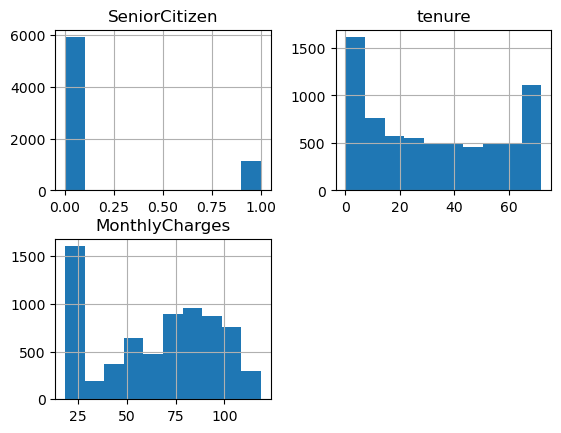

In [173]:
#The df.hist() function is used to plot histograms for each numerical column in the DataFrame 
df.hist()
#The plt.show() function displays the histograms on the screen
plt.show()

In [174]:
#removes the 'customerID' column from the DataFrame 
df = df.drop('customerID', axis=1)

In [175]:
# splitting individual elements of 'Total_Charges' ->"10 30". When you split it by whitespace, you get a list with two elements: ["10", "30"]. The length of this list is 2, so the second 
opt1 = [len(i.split()) for i in df['TotalCharges']]

# get the indices of all the sentences that have more than 1 element ( length > 1)
opt2 = [i for i in range(len(opt1)) if opt1[i] != 1]

print(f'Empty string = {len(opt2)}')



Empty string = 11


In [176]:
#dropping rows that have an empty string in 'TotalCharges' and resetting the index of the DataFrame.
df = df.drop(opt2, axis = 0).reset_index(drop=True) 


In [177]:
#converting the data type of the 'TotalCharges' column from object to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [178]:
#removing duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)


In [179]:
# summary of statistical information about the numerical columns in the DataFram including the count, mean, standard deviation, minimum and maximum values, and various percentiles.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [180]:
#return the number of missing values (NaN) in each column of the DataFrame 
df.isnull().sum()
df.dropna(inplace=True)
df.fillna(value=0, inplace=True)


In [181]:
# #splitting the columns in a dataset into two lists one for numerical features and another for categorical features.

# # distinction is based on the number of different values in the column

columns = list(df.columns)

categoric_columns = []
numeric_columns = []
for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1] # Excluding target:'Churn'

print('Numerical fetures: ',numeric_columns)
print('\nCategorical fetures: ',categoric_columns)

Numerical fetures:  ['tenure', 'MonthlyCharges', 'TotalCharges']

Categorical fetures:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [182]:
#df = pd.get_dummies(df, columns=categoric_columns)


In [183]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [184]:
# Loop through all columns in the DataFrame
for column in df.columns:
    # Check if column dtype is object (i.e. a string column)
    if df[column].dtype == 'object':
        # Use LabelEncoder to transform the column
        label = LabelEncoder()
        df[column] = label.fit_transform(df[column])


df.head(10)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   int32  
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   int32  
 3   Dependents        7010 non-null   int32  
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   int32  
 6   MultipleLines     7010 non-null   int32  
 7   InternetService   7010 non-null   int32  
 8   OnlineSecurity    7010 non-null   int32  
 9   OnlineBackup      7010 non-null   int32  
 10  DeviceProtection  7010 non-null   int32  
 11  TechSupport       7010 non-null   int32  
 12  StreamingTV       7010 non-null   int32  
 13  StreamingMovies   7010 non-null   int32  
 14  Contract          7010 non-null   int32  
 15  PaperlessBilling  7010 non-null   int32  
 16  PaymentMethod     7010 non-null   int32  


In [186]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

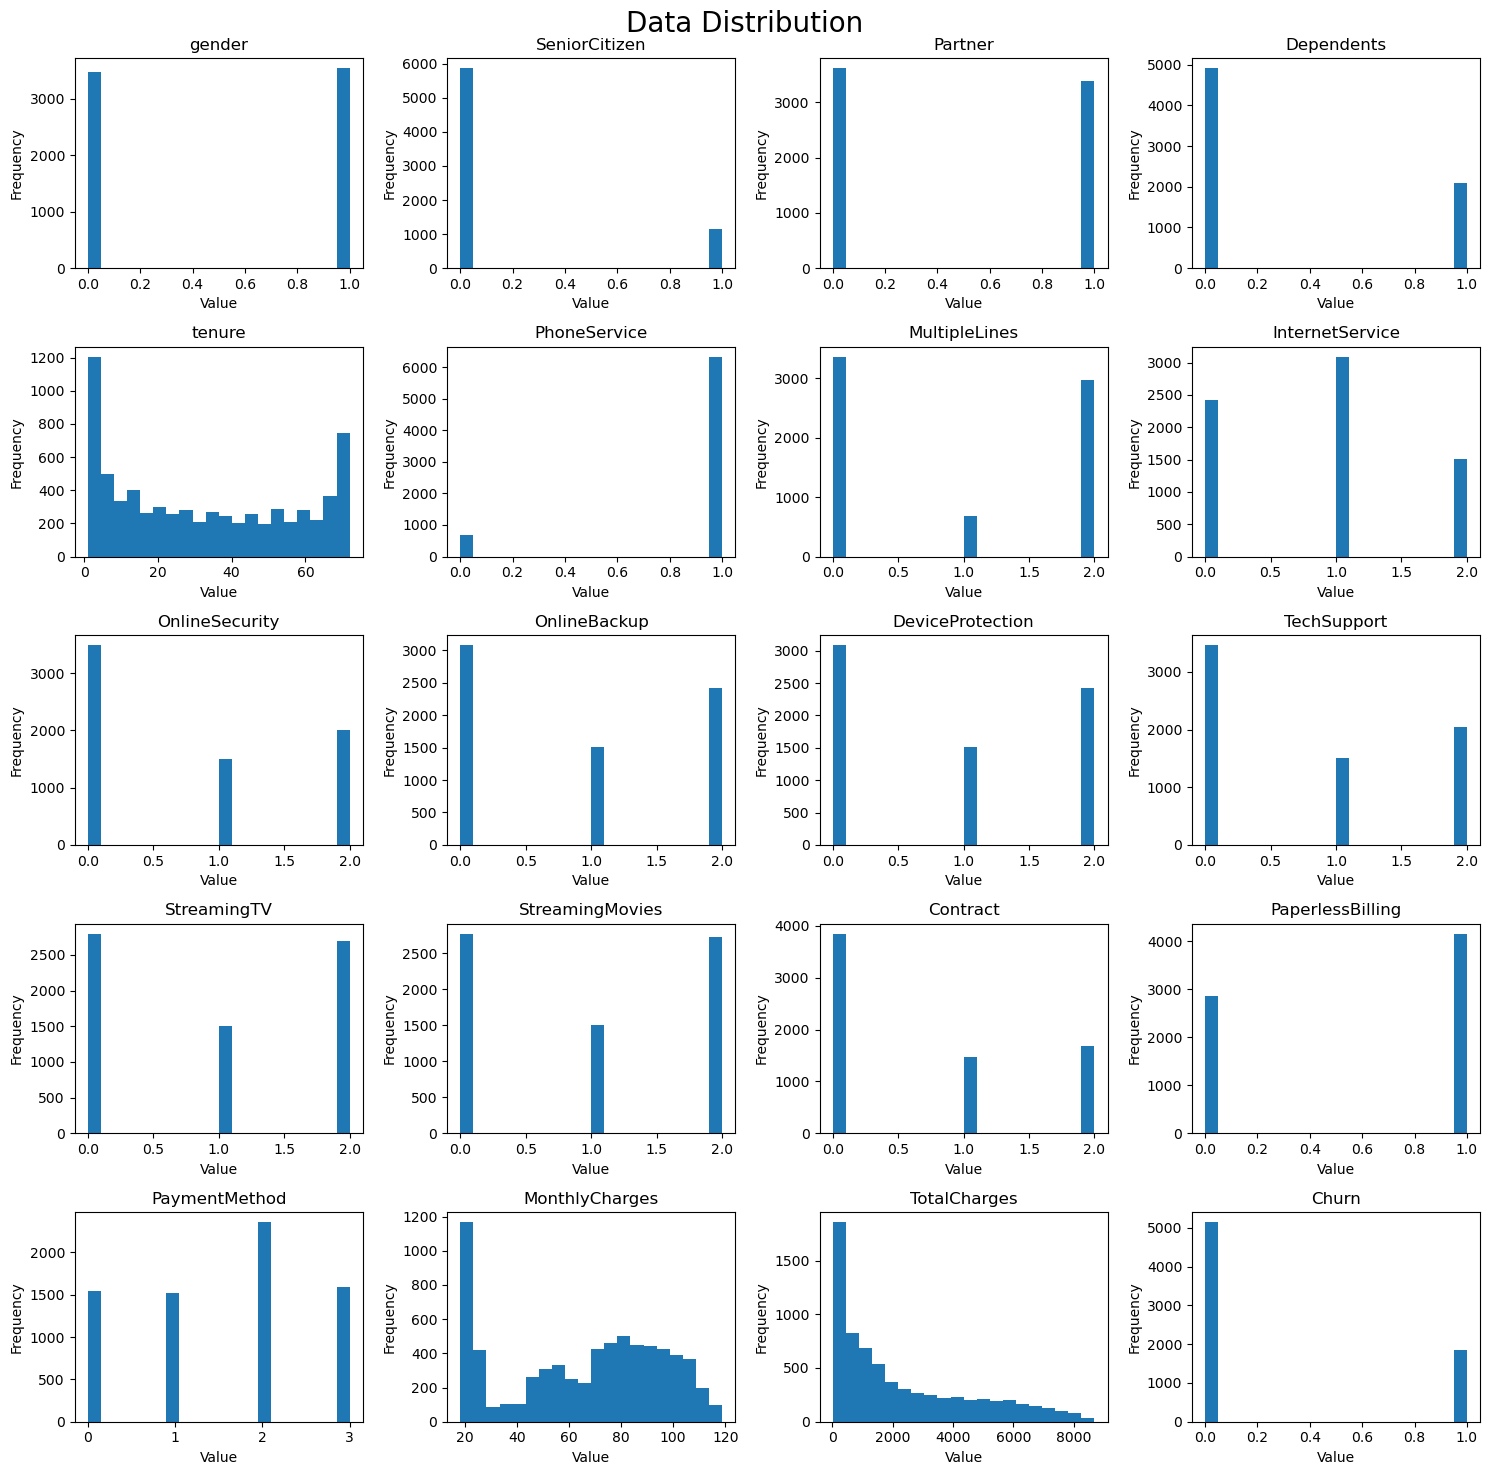

In [187]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))
fig.suptitle('Data Distribution', fontsize=20)

columns = df.columns.tolist()

for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        column = columns[i]
        ax.hist(df[column], bins=20)
        ax.set_title(column)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


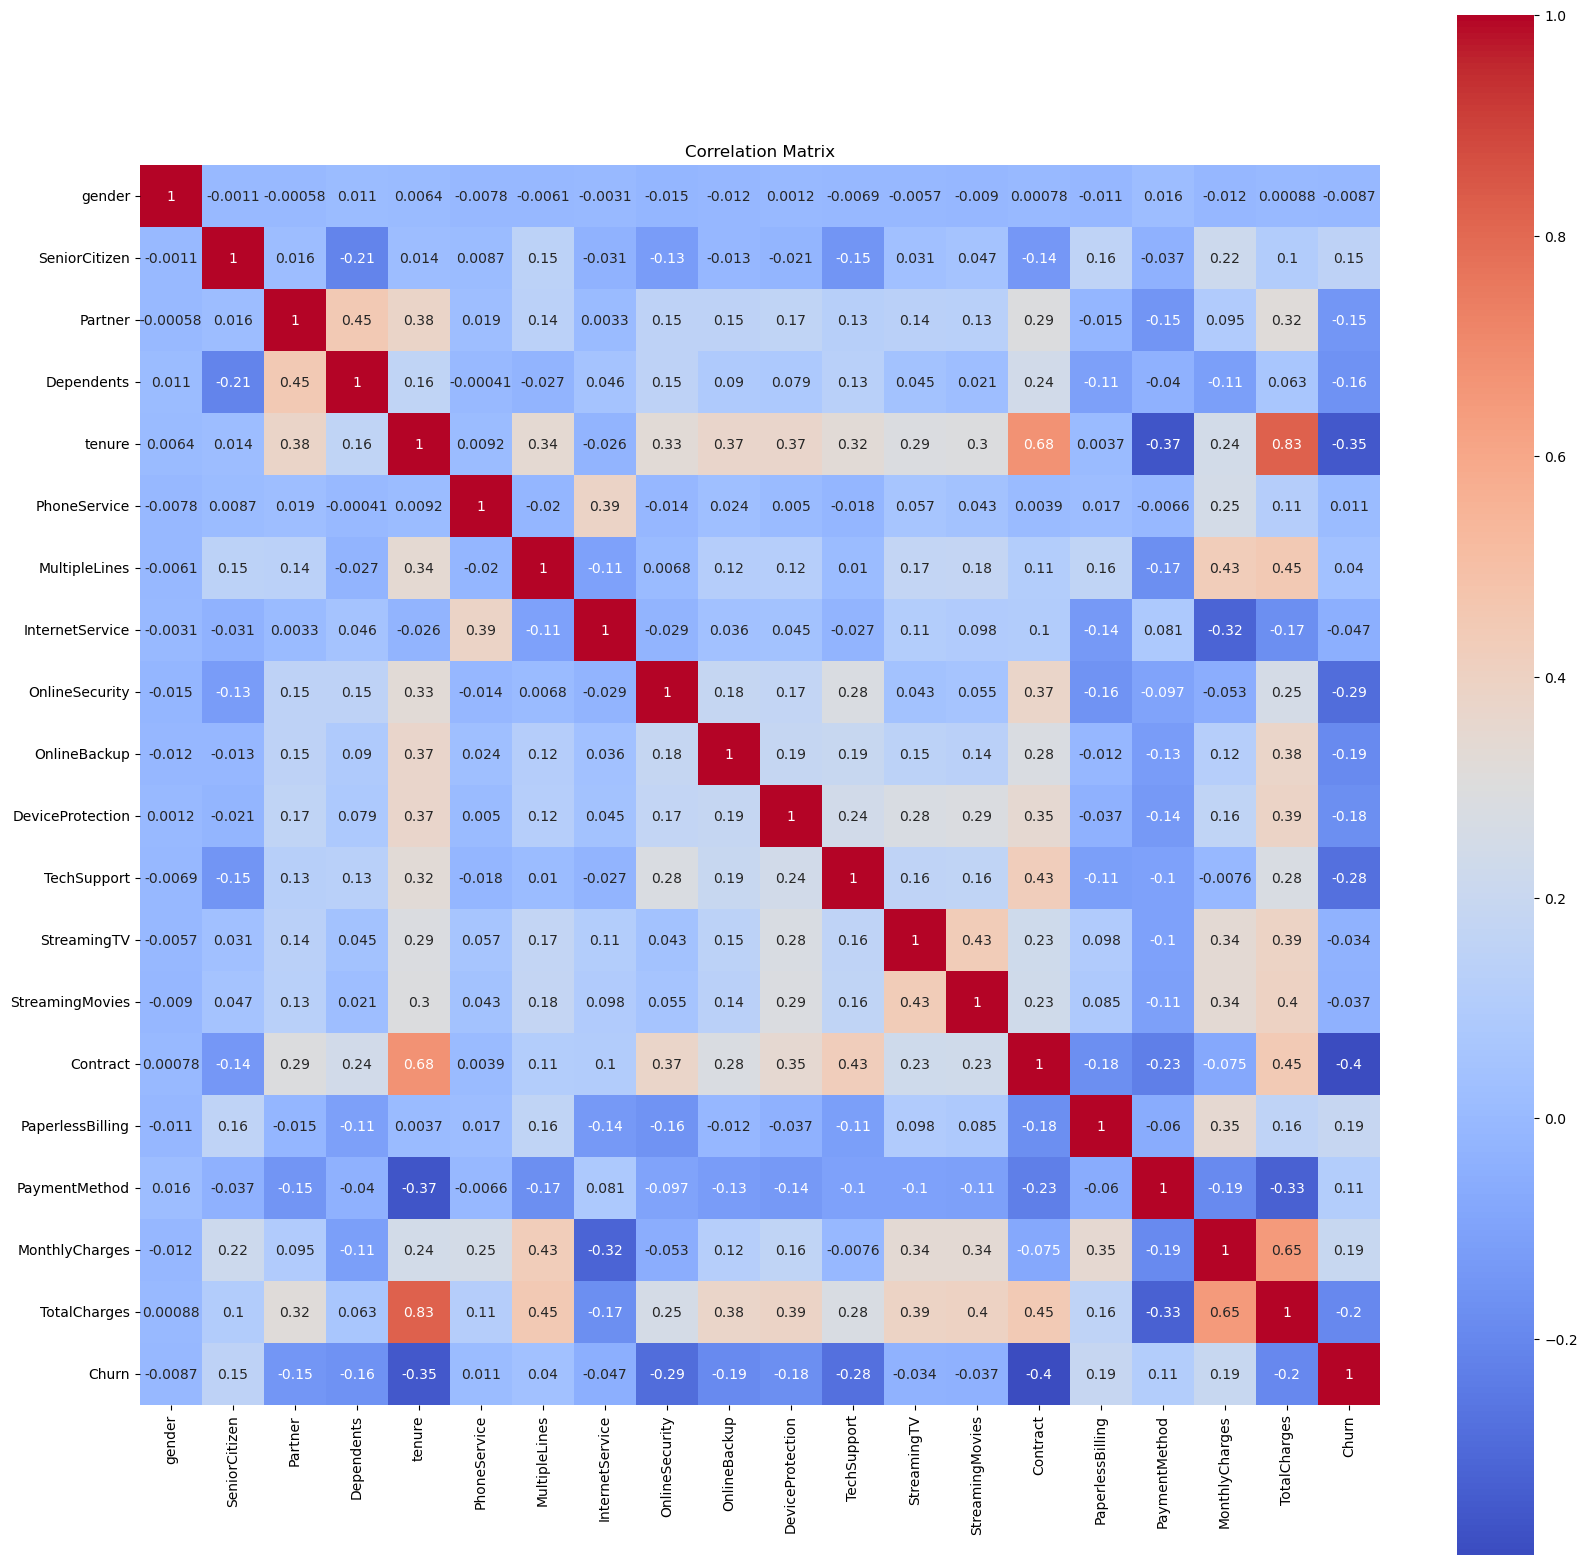

In [188]:
# create correlation matrix
corr_matrix = df.corr()

# plot heatmap
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True, ax=ax)
plt.title("Correlation Matrix")
plt.show()


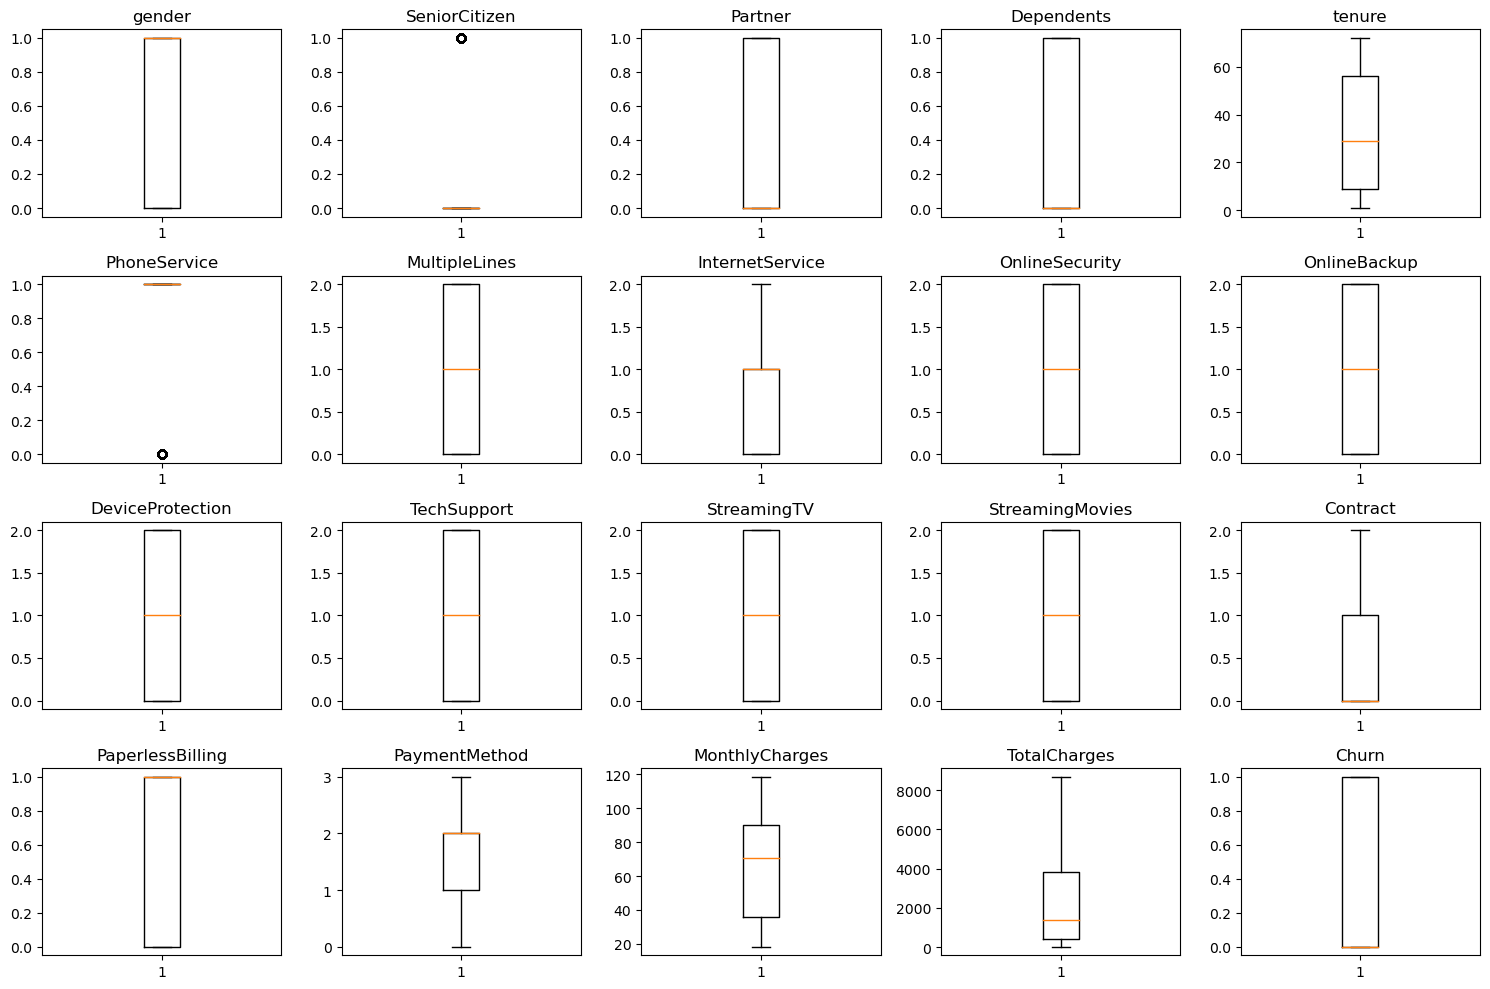

In [189]:
# create a grid layout for the plots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))

# flatten the axes array to simplify the loop
axes = axes.flatten()

# loop over each column and plot a box plot
for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.boxplot(df[col])
    ax.set_title(col)

# remove unused plots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# adjust the spacing between the plots
fig.tight_layout()

# show the plot
plt.show()


In [190]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25, random_state = 42)

In [191]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train[numeric_columns])
x_test=sc.transform(x_test[numeric_columns])

# DT

In [192]:

classifier = DT(criterion='entropy')
classifier.fit(x_train, y_train)
sc.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

conf_matrix =confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(conf_matrix)


[[1070  245]
 [ 222  216]]


In [193]:

# Create a table
table = PrettyTable()
table.field_names = ["Metric", "Score"]

# Add the performance metrics to the table
table.add_row(["Accuracy", accuracy])
table.add_row(["Precision", precision])
table.add_row(["F1-score", f1])
table.add_row(["Recall", recall])
print(table)


+-----------+--------------------+
|   Metric  |       Score        |
+-----------+--------------------+
|  Accuracy | 0.7335995436394752 |
| Precision | 0.4685466377440347 |
|  F1-score | 0.4805339265850946 |
|   Recall  | 0.4931506849315068 |
+-----------+--------------------+


In [194]:

# Assume that you have already trained and made predictions with your decision tree model, resulting in y_pred and y_true
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1315
           1       0.47      0.49      0.48       438

    accuracy                           0.73      1753
   macro avg       0.65      0.65      0.65      1753
weighted avg       0.74      0.73      0.74      1753



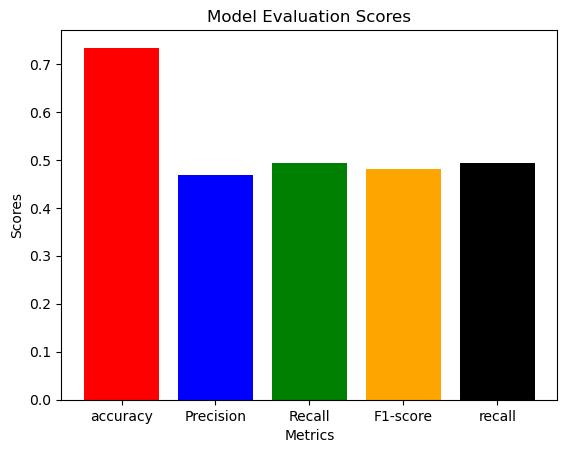

In [195]:

scores = [accuracy,precision, recall, f1,recall]
labels = ['accuracy','Precision', 'Recall', 'F1-score','recall']

fig, ax = plt.subplots()
ax.bar(labels, scores, color=['red','blue', 'green', 'orange','black'])
ax.set_title('Model Evaluation Scores')
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')

plt.show()


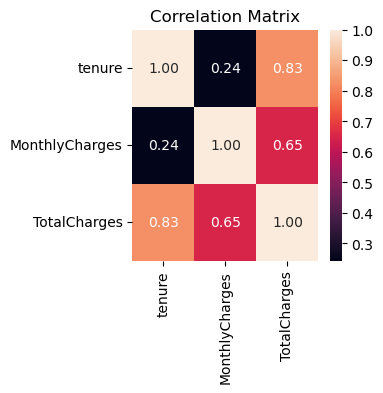

In [196]:
plt.figure(figsize=(3,3))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Naive Bayes

In [197]:
model_naive = GaussianNB()
model_naive.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_naive = model_naive.predict(x_test)
print(classification_report(y_test, y_pred_naive))

In [198]:
y_pre_naive = model_naive.predict(x_test)
print(classification_report(y_test, y_pre_naive))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1315
           1       0.55      0.57      0.56       438

    accuracy                           0.78      1753
   macro avg       0.70      0.71      0.70      1753
weighted avg       0.78      0.78      0.78      1753



In [199]:

conf_matrix_naive=confusion_matrix(y_test, y_pre_naive)
accuracy_naive = accuracy_score(y_test, y_pre_naive)
precision_naive = precision_score(y_test, y_pre_naive)
f1_naive = f1_score(y_test, y_pre_naive)
recall_naive = recall_score(y_test, y_pre_naive)
print(conf_matrix_naive)

table = PrettyTable()
table.field_names = ["Metric", "Score"]

# Add the performance metrics to the table
table.add_row(["Accuracy", accuracy_naive])
table.add_row(["Precision", precision_naive])
table.add_row(["F1-score", f1_naive])
table.add_row(["Recall", recall_naive])
print(table)

[[1111  204]
 [ 190  248]]
+-----------+--------------------+
|   Metric  |       Score        |
+-----------+--------------------+
|  Accuracy | 0.7752424415288077 |
| Precision | 0.5486725663716814 |
|  F1-score | 0.5573033707865168 |
|   Recall  | 0.5662100456621004 |
+-----------+--------------------+


# SVC

In [200]:
model_svc = SVC()
model_svc.fit(x_train, y_train)
y_pred_svc = model_svc.predict(x_test)
print(classification_report(y_test, y_pred_svc))


              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1315
           1       0.70      0.38      0.49       438

    accuracy                           0.80      1753
   macro avg       0.76      0.66      0.68      1753
weighted avg       0.79      0.80      0.78      1753



In [201]:
conf_matrix_svc=confusion_matrix(y_test, y_pred_svc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
print(conf_matrix_svc)


[[1243   72]
 [ 272  166]]


In [202]:
table = PrettyTable()
table.field_names = ["Metric", "Score"]

# Add the performance metrics to the table
table.add_row(["Accuracy", accuracy_svc])
table.add_row(["Precision", precision_svc])
table.add_row(["F1-score", f1_svc])
table.add_row(["Recall", recall_svc])
print(table)

+-----------+---------------------+
|   Metric  |        Score        |
+-----------+---------------------+
|  Accuracy |  0.8037649743297205 |
| Precision |  0.6974789915966386 |
|  F1-score | 0.49112426035502954 |
|   Recall  |  0.3789954337899543 |
+-----------+---------------------+


# Logistic Regression

In [203]:
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
y_pred_log = model_log.predict(x_test)


In [204]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1315
           1       0.67      0.46      0.54       438

    accuracy                           0.81      1753
   macro avg       0.75      0.69      0.71      1753
weighted avg       0.79      0.81      0.79      1753



In [205]:
conf_matrix_log=confusion_matrix(y_test, y_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_svc)
recall_log = recall_score(y_test, y_pred_log)
print(conf_matrix_svc)


[[1243   72]
 [ 272  166]]


In [206]:
table = PrettyTable()
table.field_names = ["Metric", "Score"]

# Add the performance metrics to the table
table.add_row(["Accuracy", accuracy_log])
table.add_row(["Precision", precision_log])
table.add_row(["F1-score", f1_log])
table.add_row(["Recall", recall_log])
print(table)

+-----------+---------------------+
|   Metric  |        Score        |
+-----------+---------------------+
|  Accuracy |   0.80718767826583  |
| Precision |  0.6655629139072847 |
|  F1-score | 0.49112426035502954 |
|   Recall  |  0.4589041095890411 |
+-----------+---------------------+


In [207]:
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "F1-score", "Recall"]

table.add_row(["Naive Bayes", accuracy_naive, precision_naive, f1_naive, recall_naive])
table.add_row(["SVM", accuracy_svc, precision_svc, f1_svc, recall_svc])
table.add_row(["Logistic Regression", accuracy_log, precision_log, f1_log, recall_log])
table.add_row(["Decision Tree", accuracy, precision, f1, recall])

print(table)

+---------------------+--------------------+--------------------+---------------------+--------------------+
|        Model        |      Accuracy      |     Precision      |       F1-score      |       Recall       |
+---------------------+--------------------+--------------------+---------------------+--------------------+
|     Naive Bayes     | 0.7752424415288077 | 0.5486725663716814 |  0.5573033707865168 | 0.5662100456621004 |
|         SVM         | 0.8037649743297205 | 0.6974789915966386 | 0.49112426035502954 | 0.3789954337899543 |
| Logistic Regression |  0.80718767826583  | 0.6655629139072847 | 0.49112426035502954 | 0.4589041095890411 |
|    Decision Tree    | 0.7335995436394752 | 0.4685466377440347 |  0.4805339265850946 | 0.4931506849315068 |
+---------------------+--------------------+--------------------+---------------------+--------------------+


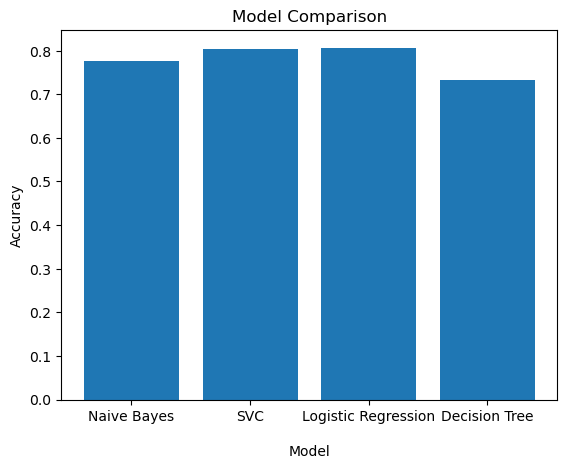

In [208]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'SVC', 'Logistic Regression', 'Decision Tree']

accuracy_scores = [accuracy_naive, accuracy_svc, accuracy_log, accuracy]

# Create a bar chart of the accuracy scores
plt.bar(models, accuracy_scores)

plt.title('Model Comparison')
plt.xlabel('\nModel')
plt.ylabel('Accuracy')

plt.show()
